In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
"""
# 1. np.random.rand(100, 1) creates 100x1 array of numbers in [0, 1)
random_values = np.random.rand(100, 1)  # eg: [[0.23], [0.67], [0.89], ...]

# 2. Multiply by 2: scales range to [0, 2)
scaled_values = 2 * random_values  # now in range [0, 2)

# 3. Add 0.5: shifts range to [0.5, 2.5)
final_values = scaled_values + 0.5  # now in range [0.5, 2.5)

# So: X = 2 * np.random.rand(100, 1) + 0.5
# creates numbers uniformly distributed between 0.5 and 2.5


# Option A: Using rand() with scaling 
X1 = 2 * np.random.rand(100, 1) + 0.5  # Features between 0.5 and 2.5

# Option B: Using uniform() - more readable
X2 = np.random.uniform(0.5, 2.5, (100, 1))  # Same result, clearer intent

# Option C: Using randn() for normally distributed features
X3 = 1.5 + 0.5 * np.random.randn(100, 1)  # Mean=1.5, Std=0.5

"""



### 1. Create Sample Data

In [4]:
# Create Sample data
# Predicting house prices based on size
np.random.seed(42)

# Random values between 0.5 and 2.5
X = 2 * np.random.rand(100, 1) + 0.5
# Scale to represent square footage ( 500 - 3500)
X = X * 1000

# True relationship: price = 50,000 + 100 * size + noise
# This means each square foot adds $100 to the price, with a base of $50,000
y = 50000 + 100 * X + np.random.randn(100,1) * 10000

print(f"Data shape:\n")
print(f"X(features) shape:{X.shape}")
print(f"y(target) shape:  {y.shape}\n")
print(f"First 5 samples\n")
print(f"Size(sq ft) | Price($)")
for i in range(5):
    print(f"{X[i, 0]:10.2f}  |{y[i, 0]:10.2f}")

Data shape:

X(features) shape:(100, 1)
y(target) shape:  (100, 1)

First 5 samples

Size(sq ft) | Price($)
   1249.08  | 175778.49
   2401.43  | 287152.79
   1963.99  | 247316.40
   1697.32  | 199856.01
    812.04  | 129007.01


### 2. Add Bias Term (Intercept)

In [7]:
# We need to add a column of ones to X for the intercept term (b)
# This is because out equation is: y = b + w1X1 + w2X2 + ....
# This b term needs a feature that's always 1

X_b = np.c_[np.ones((100, 1)), X] # Add X0 = 1 to each instance 
print(f"Original X shape: {X.shape}")
print(f"X with bias term shape: {X_b.shape}")
print(f"First 5 samples\n")
print(f"Bias   | Size (sq ft)")
for i in range(5):
    print(f"{X_b[i, 0]:4.2f}   | {X_b[i, 1]:.2f}")

Original X shape: (100, 1)
X with bias term shape: (100, 2)
First 5 samples

Bias   | Size (sq ft)
1.00   | 1249.08
1.00   | 2401.43
1.00   | 1963.99
1.00   | 1697.32
1.00   | 812.04


### 3. Apply the Normal Equation

In [10]:
print("\nNormal Equation: θ = (XᵀX)⁻¹Xᵀy")


Normal Equation: θ = (XᵀX)⁻¹Xᵀy


In [12]:
# Compute X transpose 
X_transpose = X_b.T
print(f"X transpose shape(Xᵀ): {X_transpose.shape}")
print(f" We flipped X from {X_b.shape} to {X_transpose.shape}")

X transpose shape(Xᵀ): (2, 100)
 We flipped X from (100, 2) to (2, 100)


In [14]:
# Compute X transpose * X_b
XtX = X_transpose.dot(X_b)
print(f"Shape of (XᵀX):{XtX.shape}")

Shape of (XᵀX):(2, 2)


In [16]:
# Compute the Inverse of (XᵀX)
XtX_inv = np.linalg.inv(XtX)
print(f"Shape of (XᵀX)⁻¹: {XtX_inv.shape}\n")
print(f"Inverse Matrix : {XtX_inv}")

Shape of (XᵀX)⁻¹: (2, 2)

Inverse Matrix : [[ 6.91976942e-02 -4.10991927e-05]
 [-4.10991927e-05  2.85339431e-08]]


In [18]:
# Compute Xᵀy
Xty = X_transpose.dot(y)
print(f"Shape of Xᵀy: {Xty.shape}\n")
print(f"Xᵀy : {Xty}")

Shape of Xᵀy: (2, 1)

Xᵀy : [[1.94025345e+07]
 [3.13706954e+10]]


In [20]:
# Final Multiplication
theta_best = XtX_inv.dot(Xty)
print(f"Final parameters shape:{theta_best.shape}")


Final parameters shape:(2, 1)


### 4. Interpret the Results 

In [23]:
print(f"Optimal Parameters\n")
print(theta_best)

Optimal Parameters

[[53300.39464327]
 [   97.70113386]]


In [25]:
print(f" Intercept: {theta_best[0,0]:,.2f}")
print(f" Coefficient: {theta_best[1,0]:.2f}\n")
print(f"True Relationship\nPrice = 50,000 + 100 × Size + noise\n")
print(f"But the best fit line\nPrice = {theta_best[0, 0]:,.2f} + {theta_best[1, 0]:.2f} × Size")

 Intercept: 53,300.39
 Coefficient: 97.70

True Relationship
Price = 50,000 + 100 × Size + noise

But the best fit line
Price = 53,300.39 + 97.70 × Size


### 5. Make Predictions

In [28]:
#predict for a 2000 sq-ft house
house_size = 2000
# Adding the bias term as 1
X_new = np.array([[1, house_size]])
price_prediction = X_new.dot(theta_best)
print(price_prediction)

print(f"\nFor a {house_size} sq-ft house:")
print(f"Predicted price: ${price_prediction[0,0]:,.2f}")

[[248702.66237204]]

For a 2000 sq-ft house:
Predicted price: $248,702.66


In [30]:
# Calculate using the formula directly for clarity
manual_prediction = theta_best[0, 0] + theta_best[1, 0] * house_size
print(f"Manual calculations: ${manual_prediction:,.2f}")

Manual calculations: $248,702.66


### 6. Visualizing 


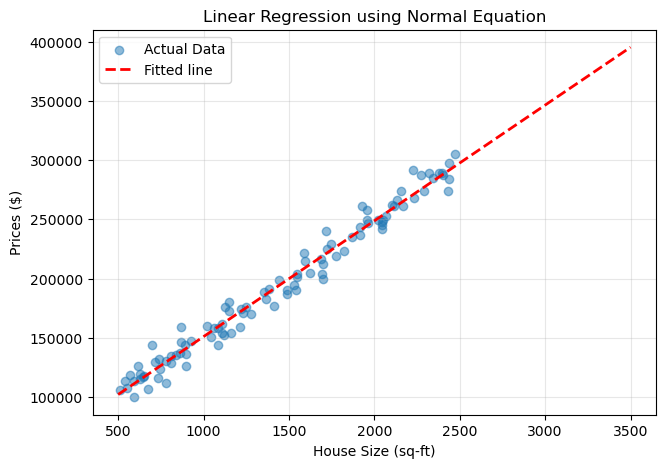

In [37]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.scatter(X, y, alpha = 0.5, label = "Actual Data")

# Create a line using our parameters

X_line = np.array([[500], [3500]])
X_line_b = np.c_[np.ones((2, 1)), X_line]
y_predict = X_line_b.dot(theta_best)
plt.plot(X_line, y_predict, "r--", linewidth = 2, label = "Fitted line")
plt.xlabel("House Size (sq-ft)")
plt.ylabel("Prices ($)")
plt.title("Linear Regression using Normal Equation")
plt.legend()
plt.grid(True, alpha = 0.3)
